In [1]:
import plotly.express as px
import pandas as pd
import sqlite3 as db
import time
from geopy.geocoders import Nominatim
import numpy as np

In [2]:
# Connect to your SQLite database
con = db.connect('ubicando.db')

# Load the table data into a pandas DataFrame
df = pd.read_sql_query('SELECT * FROM Final_dataset', con)


# Commit the changes and close the connection
con.commit()
con.close()

### Map with Name, Sector and Capital

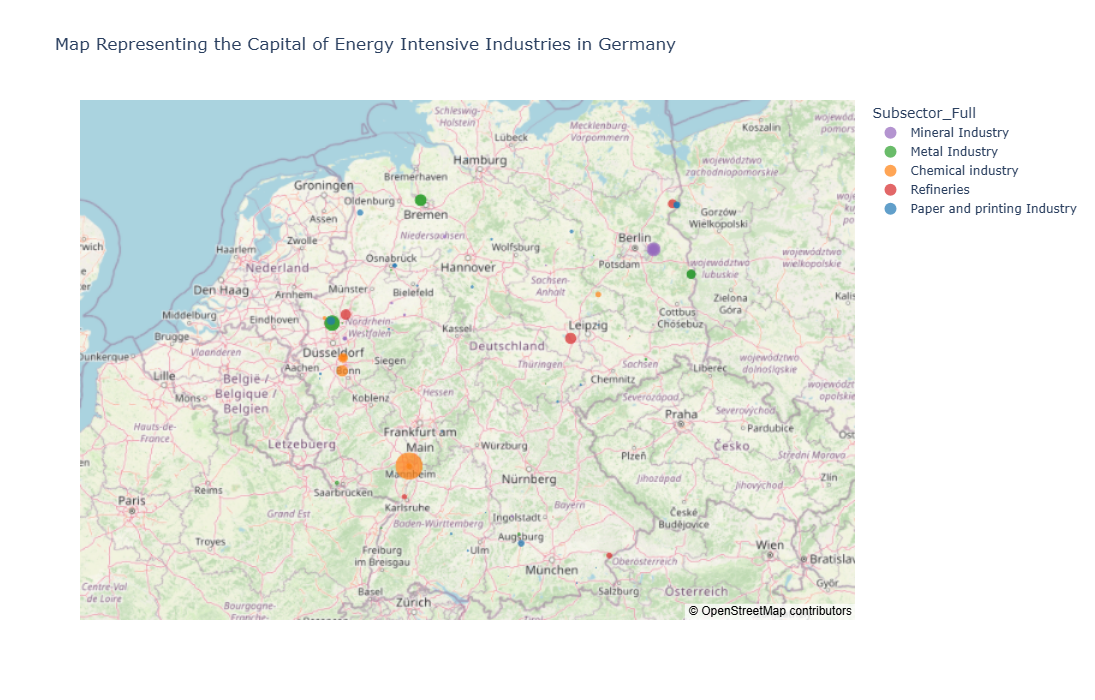

In [17]:


# Define the color map for the broader categories
subsectors_colormap = {
    'Paper and printing Industry': '#1f77b4',  # Blue
    'Chemical industry': '#ff7f0e',  # Orange
    'Metal Industry': '#2ca02c',  # Green for all metal-related subsectors
    'Mineral Industry': '#9467bd',  # Purple for all mineral-related subsectors
    'Refineries': '#d62728'  # Red
}


# Create the 'Subsector_Full' column based on conditions
df['Subsector_Full'] = np.where(
    df['Subsector_Name'] != '-',  # Check if 'Subsector_Name' is not '-'
    df['Subsector_Name'],  # If true, use 'Subsector_Name'
    df['Eurostat_Name']    # If false (i.e., '-'), use 'Eurostat_Name'
)

# Convert Latitude and Longitude to numeric, coercing errors to NaN
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with missing or invalid Latitude/Longitude
df = df.dropna(subset=['Latitude', 'Longitude'])

# Map specific subsectors to broader categories
sector_mapping = {
    'Metal Processing': 'Metal Industry',
    'Steel, primary': 'Metal Industry',
    'Iron and steel': 'Metal Industry',
    'Non-ferrous metals': 'Metal Industry',
    'Non-metallic minerals': 'Mineral Industry',
    'Mineral Processing': 'Mineral Industry',
    'Paper and printing': 'Paper and printing Industry'
}


    
# Apply the mapping to create broader categories
df['Subsector_Full'] = df['Subsector_Full'].replace(sector_mapping)

# Proceed with the plot as before
fig = px.scatter_mapbox(
    df,
    lon='Longitude',
    lat='Latitude',
    size='Capital',
    color='Subsector_Full',
    color_discrete_map=subsectors_colormap,
    hover_name='Name',
    hover_data={
        'Capital': True,
        'Subsector_Full': True
    },
    zoom=5,
    width=1000,
    height=700,
    title='Map Representing the Capital of Energy Intensive Industries in Germany'
)

# Update layout and hovertemplate
fig.update_layout(
    mapbox_style="open-street-map",
    coloraxis_colorbar_title='Sector'
)

fig.update_traces(
    hovertemplate='<b>Sector: %{customdata[1]}</b><br>'
        'Company: %{hovertext}<br>'
        'Capital: %{customdata[0]} €<br>'
)

# Show plot
fig.show()

# Save the plot as an HTML file
fig.write_html('Map_Representing_Capital_of_Energy_Intensive_Industries_Germany.html')


### Map with Name, Sector, Capital, Hydrogen Potential and Heat Recovery Potential

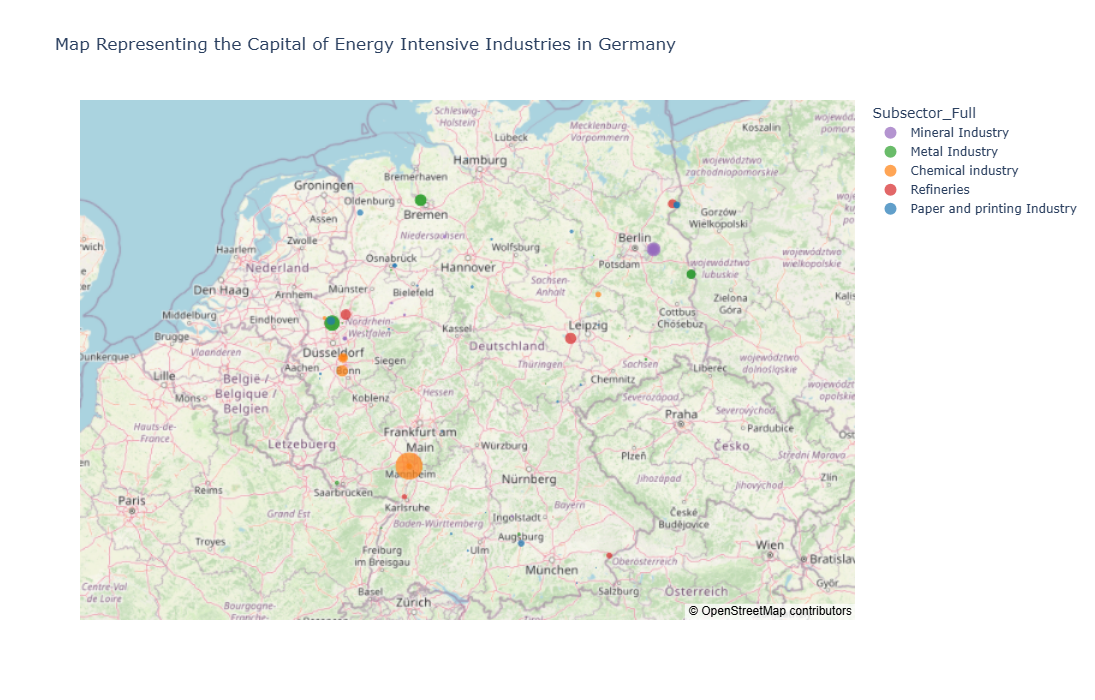

In [4]:
# Plotting the map with custom hover information

# Map specific subsectors to broader categories
sector_mapping = {
    'Metal Processing': 'Metal Industry',
    'Steel, primary': 'Metal Industry',
    'Iron and steel': 'Metal Industry',
    'Non-ferrous metals': 'Metal Industry',
    'Non-metallic minerals': 'Mineral Industry',
    'Mineral Processing': 'Mineral Industry',
    'Paper and printing': 'Paper and printing Industry'
}

# Define the color map for the broader categories
subsectors_colormap = {
    'Paper and printing Industry': '#1f77b4',  # Blue
    'Chemical industry': '#ff7f0e',  # Orange
    'Metal Industry': '#2ca02c',  # Green for all metal-related subsectors
    'Mineral Industry': '#9467bd',  # Purple for all mineral-related subsectors
    'Refineries': '#d62728'  # Red
}


# Create the 'Subsector_Full' column based on conditions
df['Subsector_Full'] = np.where(
    df['Subsector_Name'] != '-',  # Check if 'Subsector_Name' is not '-'
    df['Subsector_Name'],  # If true, use 'Subsector_Name'
    df['Eurostat_Name']    # If false (i.e., '-'), use 'Eurostat_Name'
)

# Apply the mapping to create broader categories
df['Subsector_Full'] = df['Subsector_Full'].replace(sector_mapping)


# Convert Latitude and Longitude to numeric, coercing errors to NaN
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with missing or invalid Latitude/Longitude
df = df.dropna(subset=['Latitude', 'Longitude'])

fig = px.scatter_mapbox(
    df,
    lon='Longitude',
    lat='Latitude',
    size='Capital',
    color='Subsector_Full',  # Use the broader Subsector_Full column
    color_discrete_map=subsectors_colormap,  # Apply the new color map
    hover_name='Name',  # Show the company name on hover
    hover_data={
        'Capital': True,
        'Subsector_Full': True,
        'Distributed H2-Potential in TWh': True,  # Include hydrogen potential
        'Distributed level_3_Tj': True  # Include heat-recovery potential
    },  # Additional hover info
    zoom=5,
    width=1000,
    height=700,
    title='Map Representing the Capital of Energy Intensive Industries in Germany'
)

# Update the layout
fig.update_layout(
    mapbox_style="open-street-map",
    coloraxis_colorbar_title='Sector'  # Customize the legend title
)

# Customize the hover text to add hydrogen and heat-recovery potential
fig.update_traces(
    hovertemplate=(
        '<b>Sector: %{customdata[1]}</b><br>'
        'Company: %{hovertext}<br>'
        'Capital: %{customdata[0]} €<br>'
        'Hydrogen potential: %{customdata[2]} TWh<br>'
        'Heat-recovery potential: %{customdata[3]} TJ<extra></extra>'
    )
)

# Show the plot
fig.show()

# Export the plot as an HTML file
fig.write_html('Map_Representing_Capital_of_Energy_Intensive_Industries_Germany.html')
